In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv("/Users/mariel/Downloads/fct_invoice.csv")



      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card   05/08/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

**How many unique customers are in the dataset?**

In [6]:
unique_customers = df["customer_id"].nunique()
print(unique_customers)

5191


**What are the different categories of products available? How many unique categories are there?**

In [7]:
product_categories1 = df["category"].unique()
product_categories2 = df["category"].nunique()

print(product_categories1)
print(product_categories2)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


 **Which payment method is the most popular? How many times was it used?**

In [20]:
#if only most popular payment method is displayed
popular_payment_method1 = df["payment_method"].value_counts(ascending=False).head(1)

#payment methods ranked
popular_payment_method2 = df["payment_method"].value_counts(ascending=False)

print(popular_payment_method1)

payment_method
Cash    44447
Name: count, dtype: int64


**What are the three most popular categories, by total sales?**

In [27]:
#if only three most popular categories is displayed
df["total sales"] = df["price"] * df["quantity"]
three_popular_categories1 = df.groupby("category").sum(numeric_only = True)["total sales"].sort_values(ascending=False).head(3)

#categories ranked
three_popular_categories2 = df.groupby("category").sum(numeric_only = True)["total sales"].sort_values(ascending=False)

print(three_popular_categories1)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total sales, dtype: float64


In [28]:
json_df = pd.read_json("Users/mariel/Downloads/dim_customer.json")
print(json_df)


,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [29]:
merged_df = df.merge(json_df, how = "left", left_on = "customer_id", right_on = "id")
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,05/08/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,09/11/2021,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,1089,Rhodes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25,53.0,Michelle,F,2344,Stevens
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92,NaN,Lauren,F,172,Perkins
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92,36.0,Mark,M,425,Pham
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00,64.0,David,M,577,Williams


**What are the total sales attributed to customers over the age of 45?**

In [37]:
customer_sales = merged_df[merged_df["age"] > 45].sum()["total sales"]
print(customer_sales)


82039768.15


**How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)**

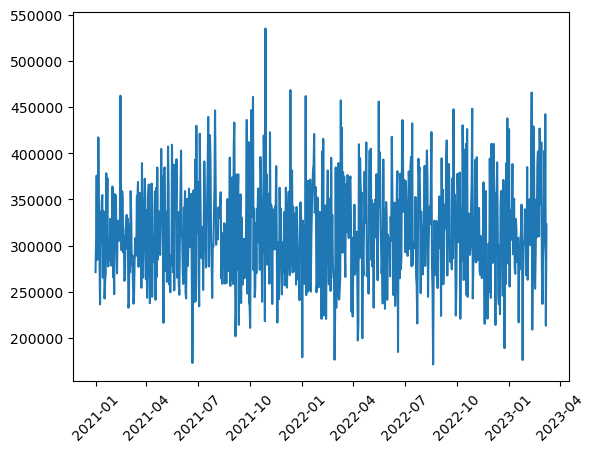

In [40]:
import matplotlib.pyplot as plt

merged_df["invoice_date"] = pd.to_datetime(merged_df["invoice_date"],dayfirst=True)

dummy_data = merged_df.groupby('invoice_date').sum(numeric_only=True)["total sales"]

plt.plot(dummy_data.index,dummy_data.values)

plt.xticks(rotation=45)

plt.show()

**Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).**

In [42]:

merged_df['age_range'] = (merged_df['age'] // 10) * 10

pivot_table = merged_df.pivot_table(
    values='total sales', 
    index='category', 
    columns='age_range', 
    aggfunc='sum', 
    margins=True, 
    margins_name='Total'
)

print(pivot_table)


age_range              10.0         20.0         30.0         40.0  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   
Total            4259300.00  22636074.19  26093876.40  25494420.27   

age_range               50.0         60.0         70.0        80.0  \
category                                                             
Books               74962.20     80476.80     54827.85    26664.00   
Clothing         10